In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline

import optuna 
import math
import seaborn as sns
from datetime import timedelta
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

import xgboost as xgb

やや不均衡なデータセットであるため、評価指標は正解率より、適合率や再現率の方が望ましい。
よって適合率と再現率を組み合わせたF1スコア指標にハイパーパラメータチューニングをする。

## 5クラス分類

In [8]:
df = pd.read_csv('xception_256_text_256_5classes.csv')

X = df.drop('profit_flg', axis=1)
y = df['profit_flg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20, 
                                                    stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20, 
                                                    stratify = y_train)

In [3]:
def objective(trial):  
    # ハイパーパラメータ  
    eta = trial.suggest_uniform("eta", 0.01, 0.2)  
    learning_rate = trial.suggest_uniform(" learning_rate", 0.0, 1.0)  
    max_depth = trial.suggest_int("max_depth", 2, 100)  
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)  
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)  

    # 学習  
    model = xgb.XGBClassifier(
        objective="multi:softprob",
        eta=eta,  
        learning_rate=learning_rate,  
        max_depth=max_depth,  
        subsample=subsample,  
        colsample_bytree=colsample_bytree, 
        random_state=42)  
    
    model.fit(X_train, y_train)  

    # 予測  
    y_pred = model.predict(X_val)  
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    return (1-f1)

In [4]:
study = optuna.create_study()  
study.optimize(objective, n_trials=100)  
print(study.best_params)  
print(study.best_value)

[I 2020-12-30 19:05:08,458] Trial 0 finished with value: 0.5039660324177658 and parameters: {'eta': 0.16821267240322715, ' learning_rate': 0.3322067411966988, 'max_depth': 20, 'subsample': 0.7616920809102925, 'colsample_bytree': 0.9484696392879258}. Best is trial 0 with value: 0.5039660324177658.
[I 2020-12-30 19:05:48,702] Trial 1 finished with value: 0.5384756967878666 and parameters: {'eta': 0.19634281444576698, ' learning_rate': 0.9113174473231921, 'max_depth': 14, 'subsample': 0.6854460971836773, 'colsample_bytree': 0.9389189619926416}. Best is trial 0 with value: 0.5039660324177658.
[I 2020-12-30 19:06:11,235] Trial 2 finished with value: 0.5452498780523305 and parameters: {'eta': 0.10559604080560729, ' learning_rate': 0.6294055411055055, 'max_depth': 2, 'subsample': 0.6288849352809898, 'colsample_bytree': 0.8164580170849003}. Best is trial 0 with value: 0.5039660324177658.
[I 2020-12-30 19:07:41,519] Trial 3 finished with value: 0.5193175503533387 and parameters: {'eta': 0.11706

[I 2020-12-30 19:28:26,903] Trial 27 finished with value: 0.5106825660706344 and parameters: {'eta': 0.010900801369011582, ' learning_rate': 0.6789392791406024, 'max_depth': 18, 'subsample': 0.9246428470624712, 'colsample_bytree': 0.7782142172377767}. Best is trial 8 with value: 0.4972589193553304.
[I 2020-12-30 19:29:31,442] Trial 28 finished with value: 0.5004093561765505 and parameters: {'eta': 0.05287098497741068, ' learning_rate': 0.4336816103233019, 'max_depth': 27, 'subsample': 0.9330218152648662, 'colsample_bytree': 0.8834909975019434}. Best is trial 8 with value: 0.4972589193553304.
[I 2020-12-30 19:30:57,605] Trial 29 finished with value: 0.5039160334105365 and parameters: {'eta': 0.030081807932175124, ' learning_rate': 0.3109623847181089, 'max_depth': 20, 'subsample': 0.8099842419181639, 'colsample_bytree': 0.9930537385740108}. Best is trial 8 with value: 0.4972589193553304.
[I 2020-12-30 19:32:41,168] Trial 30 finished with value: 0.5208654447880394 and parameters: {'eta': 

[I 2020-12-30 19:57:09,039] Trial 54 finished with value: 0.4960799259318832 and parameters: {'eta': 0.02774185986257277, ' learning_rate': 0.642297504848895, 'max_depth': 12, 'subsample': 0.8692389116158433, 'colsample_bytree': 0.8956537528551816}. Best is trial 50 with value: 0.48527293812570005.
[I 2020-12-30 19:58:00,912] Trial 55 finished with value: 0.5034711436916145 and parameters: {'eta': 0.017956033244186976, ' learning_rate': 0.7401708920906814, 'max_depth': 11, 'subsample': 0.826275654017751, 'colsample_bytree': 0.9640464558037277}. Best is trial 50 with value: 0.48527293812570005.
[I 2020-12-30 19:58:49,671] Trial 56 finished with value: 0.5069827516288413 and parameters: {'eta': 0.02538353410865632, ' learning_rate': 0.659698770007973, 'max_depth': 14, 'subsample': 0.8709560504426197, 'colsample_bytree': 0.8585227628164499}. Best is trial 50 with value: 0.48527293812570005.
[I 2020-12-30 19:59:31,667] Trial 57 finished with value: 0.5116776504445929 and parameters: {'eta'

[I 2020-12-30 20:19:14,948] Trial 81 finished with value: 0.5232113991411822 and parameters: {'eta': 0.029421447999185515, ' learning_rate': 0.5628293970468676, 'max_depth': 20, 'subsample': 0.9620239516119976, 'colsample_bytree': 0.7265858771692292}. Best is trial 78 with value: 0.471150267887927.
[I 2020-12-30 20:20:04,780] Trial 82 finished with value: 0.501883431240584 and parameters: {'eta': 0.0213118453723354, ' learning_rate': 0.6050242755318229, 'max_depth': 27, 'subsample': 0.9024021242846739, 'colsample_bytree': 0.7681822381744434}. Best is trial 78 with value: 0.471150267887927.
[I 2020-12-30 20:20:55,755] Trial 83 finished with value: 0.5282163199457641 and parameters: {'eta': 0.036683972664013374, ' learning_rate': 0.5249060974464269, 'max_depth': 42, 'subsample': 0.8655306485718212, 'colsample_bytree': 0.7424079365313627}. Best is trial 78 with value: 0.471150267887927.
[I 2020-12-30 20:21:42,195] Trial 84 finished with value: 0.5282174406682121 and parameters: {'eta': 0.

{'eta': 0.03741665524610382, ' learning_rate': 0.5568957352693517, 'max_depth': 34, 'subsample': 0.8595969389884284, 'colsample_bytree': 0.7334789486609876}
0.471150267887927


In [9]:
xgb_model = xgb.XGBClassifier(
        objective="multi:softprob",
        eta=0.03741665524610382,  
        learning_rate=0.5568957352693517,  
        max_depth=34,  
        subsample=0.8595969389884284,  
        colsample_bytree=0.7334789486609876, 
        random_state=42)

eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_model.fit(X_train, y_train, 
              eval_metric="mlogloss", 
              eval_set=eval_set, 
              verbose=False)


y_pred = xgb_model.predict(X_test)

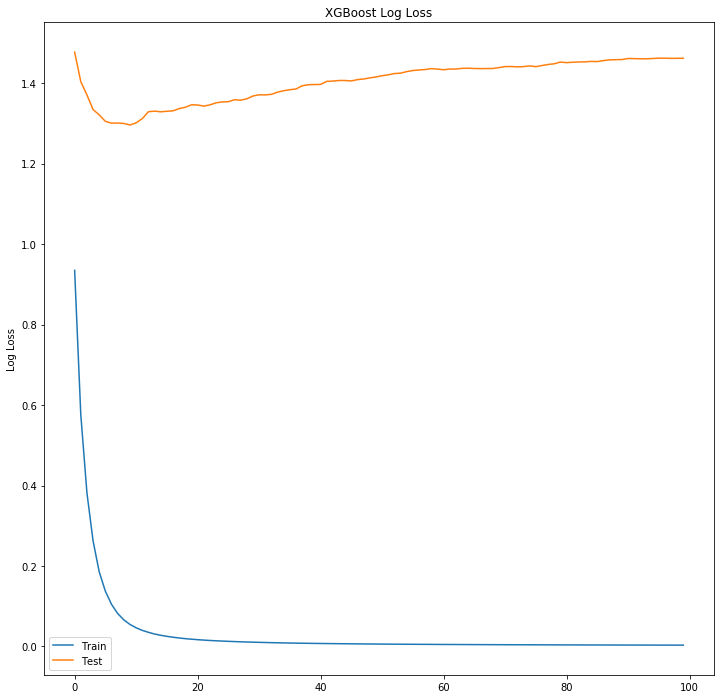

In [10]:
#学習曲線
results = xgb_model.evals_result()
epochs = len(results["validation_0"]["mlogloss"])
x_axis = range(0, epochs)

fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["mlogloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["mlogloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("XGBoost Log Loss")
pyplot.show()

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.01%


In [12]:
# 混同行列の計算
df_accuracy = pd.DataFrame({'true label': y_test,
                            'predicted label': y_pred})
pd.crosstab(df_accuracy['true label'], df_accuracy['predicted label'])

predicted label,lv0,lv1,lv2,lv3,lv4
true label,,,,,
lv0,53,40,2,0,0
lv1,20,272,45,6,2
lv2,10,120,60,3,0
lv3,10,42,30,5,3
lv4,11,16,7,3,11


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         lv0       0.51      0.56      0.53        95
         lv1       0.56      0.79      0.65       345
         lv2       0.42      0.31      0.36       193
         lv3       0.29      0.06      0.09        90
         lv4       0.69      0.23      0.34        48

    accuracy                           0.52       771
   macro avg       0.49      0.39      0.40       771
weighted avg       0.49      0.52      0.48       771



In [14]:
#AUC
y_test_bi = label_binarize(y_test, classes=['lv0', 'lv1', 'lv2', 'lv3', 'lv4'])
y_pred_bi = label_binarize(y_pred, classes=['lv0', 'lv1', 'lv2', 'lv3', 'lv4'])
auc = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovo")
print(auc)

0.6184857214577295


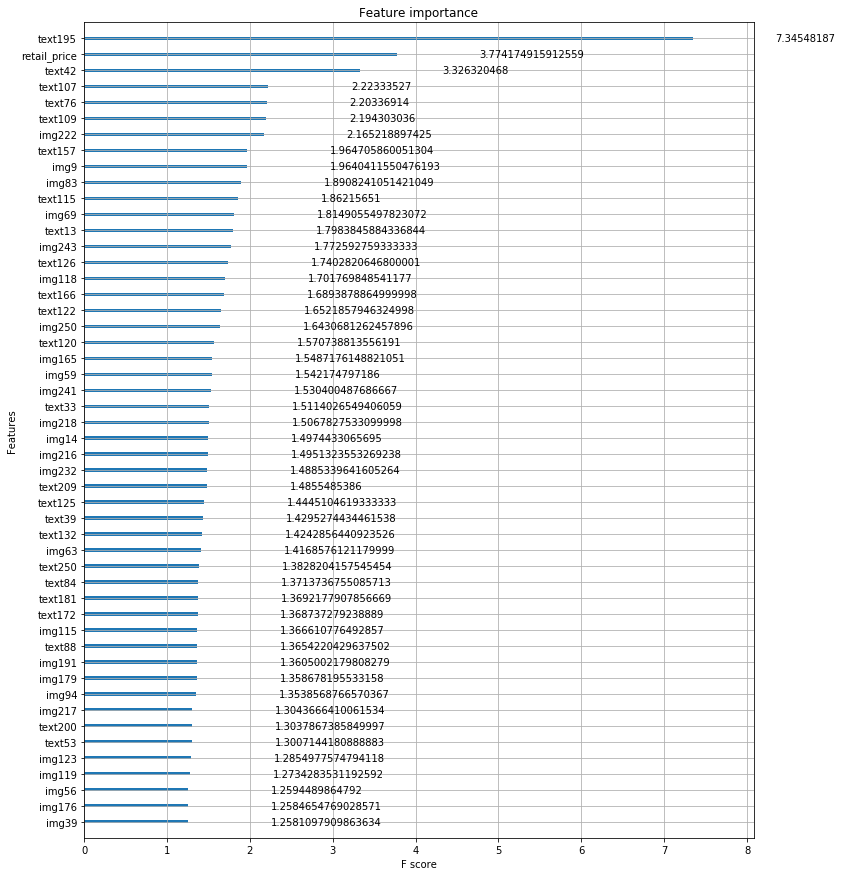

In [15]:
_, ax = plt.subplots(figsize=(12, 15))
xgb.plot_importance(xgb_model, ax=ax, max_num_features=50,importance_type='gain')

## 3クラス分類

In [16]:
df = pd.read_csv('xception_256_text_256_3classes.csv')

X = df.drop('profit_flg', axis=1)
y = df['profit_flg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20, 
                                                    stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20, 
                                                    stratify = y_train)

In [6]:
def objective(trial):  
    # ハイパーパラメータ  
    eta = trial.suggest_uniform("eta", 0.01, 0.2)  
    learning_rate = trial.suggest_uniform(" learning_rate", 0.0, 1.0)  
    max_depth = trial.suggest_int("max_depth", 2, 100)  
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)  
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)  

    # 学習  
    model = xgb.XGBClassifier(
        objective="multi:softprob",
        eta=eta,  
        learning_rate=learning_rate,  
        max_depth=max_depth,  
        subsample=subsample,  
        colsample_bytree=colsample_bytree, 
        random_state=42)  
    
    model.fit(X_train, y_train)  

    # 予測  
    y_pred = model.predict(X_val)  
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    return (1-f1)

In [7]:
study = optuna.create_study()  
study.optimize(objective, n_trials=100)  
print(study.best_params)  
print(study.best_value)

[I 2020-12-30 20:37:01,912] Trial 0 finished with value: 0.4460996494055526 and parameters: {'eta': 0.12151889280550243, ' learning_rate': 0.5193838284663629, 'max_depth': 21, 'subsample': 0.9998427575121136, 'colsample_bytree': 0.6796504543775695}. Best is trial 0 with value: 0.4460996494055526.
[I 2020-12-30 20:37:38,027] Trial 1 finished with value: 0.44103101586615756 and parameters: {'eta': 0.18128427142911802, ' learning_rate': 0.28453327968364783, 'max_depth': 14, 'subsample': 0.8389102490636247, 'colsample_bytree': 0.5868740266197321}. Best is trial 1 with value: 0.44103101586615756.
[I 2020-12-30 20:38:01,160] Trial 2 finished with value: 0.4207023535550807 and parameters: {'eta': 0.16023256071746, ' learning_rate': 0.5565513529380389, 'max_depth': 84, 'subsample': 0.6554868490889327, 'colsample_bytree': 0.5117532320321454}. Best is trial 2 with value: 0.4207023535550807.
[I 2020-12-30 20:38:31,394] Trial 3 finished with value: 0.4441365118373868 and parameters: {'eta': 0.0376

[I 2020-12-30 20:53:11,575] Trial 27 finished with value: 0.46636847635384127 and parameters: {'eta': 0.12130860430057158, ' learning_rate': 0.7218852668589705, 'max_depth': 2, 'subsample': 0.6318024841245369, 'colsample_bytree': 0.885381811598977}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 20:53:46,223] Trial 28 finished with value: 0.4217110351698863 and parameters: {'eta': 0.05036158910510796, ' learning_rate': 0.46485779889615353, 'max_depth': 47, 'subsample': 0.5714519307128157, 'colsample_bytree': 0.7645692042874874}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 20:54:14,962] Trial 29 finished with value: 0.41842618813632637 and parameters: {'eta': 0.08549307939187867, ' learning_rate': 0.909210055034033, 'max_depth': 16, 'subsample': 0.8015062475613631, 'colsample_bytree': 0.6749378372704432}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 20:54:38,925] Trial 30 finished with value: 0.43349706124171583 and parameters: {'e

[I 2020-12-30 21:09:55,173] Trial 54 finished with value: 0.4206533630250707 and parameters: {'eta': 0.06200440277927137, ' learning_rate': 0.3995077400146953, 'max_depth': 30, 'subsample': 0.7226113317636885, 'colsample_bytree': 0.9569708780068877}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 21:10:34,321] Trial 55 finished with value: 0.45225124282213525 and parameters: {'eta': 0.0974063778447336, ' learning_rate': 0.3442925971533928, 'max_depth': 11, 'subsample': 0.8198079786440653, 'colsample_bytree': 0.7338965646823655}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 21:10:56,742] Trial 56 finished with value: 0.4442043871834609 and parameters: {'eta': 0.052097569165007, ' learning_rate': 0.9935597571120522, 'max_depth': 17, 'subsample': 0.7833393261171337, 'colsample_bytree': 0.6964705994795589}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 21:12:14,252] Trial 57 finished with value: 0.4273130481381958 and parameters: {'eta'

[I 2020-12-30 21:28:30,808] Trial 81 finished with value: 0.4319248305230492 and parameters: {'eta': 0.14299180155600966, ' learning_rate': 0.42574489021801926, 'max_depth': 3, 'subsample': 0.7690035981932607, 'colsample_bytree': 0.9061801597602606}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 21:29:30,265] Trial 82 finished with value: 0.4226119482146451 and parameters: {'eta': 0.1820129989925305, ' learning_rate': 0.23132565372981664, 'max_depth': 21, 'subsample': 0.8583162236730415, 'colsample_bytree': 0.8906918932699655}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 21:30:10,723] Trial 83 finished with value: 0.4307788799586345 and parameters: {'eta': 0.13261854297341985, ' learning_rate': 0.5219235053975307, 'max_depth': 12, 'subsample': 0.745987986468053, 'colsample_bytree': 0.9254043251043754}. Best is trial 16 with value: 0.40497763447216983.
[I 2020-12-30 21:30:52,239] Trial 84 finished with value: 0.41119888077472677 and parameters: {'et

{'eta': 0.08699485336464731, ' learning_rate': 0.8724557305695748, 'max_depth': 43, 'subsample': 0.710929596975665, 'colsample_bytree': 0.7386501718158603}
0.40497763447216983


In [17]:
xgb_model = xgb.XGBClassifier(
        objective="multi:softprob",
        eta=0.08699485336464731,  
        learning_rate=0.8724557305695748,  
        max_depth=43,  
        subsample=0.710929596975665,  
        colsample_bytree=0.7386501718158603, 
        random_state=42)

eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_model.fit(X_train, y_train, 
              eval_metric="mlogloss", 
              eval_set=eval_set, 
              verbose=False)


y_pred = xgb_model.predict(X_test)

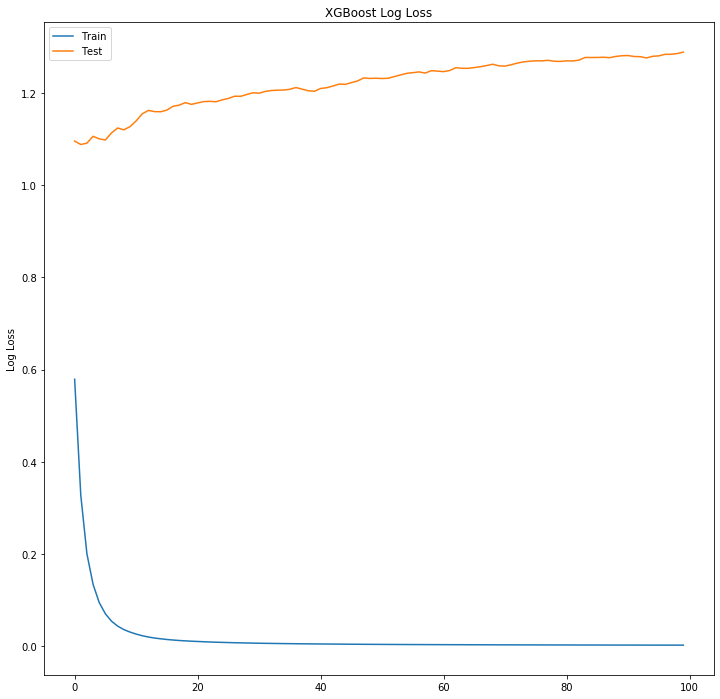

In [18]:
#学習曲線
results = xgb_model.evals_result()
epochs = len(results["validation_0"]["mlogloss"])
x_axis = range(0, epochs)

fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["mlogloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["mlogloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("XGBoost Log Loss")
pyplot.show()

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.53%


In [20]:
# 混同行列の計算
df_accuracy = pd.DataFrame({'true label': y_test,
                            'predicted label': y_pred})
pd.crosstab(df_accuracy['true label'], df_accuracy['predicted label'])

predicted label,lv0,lv1,lv2
true label,,,
lv0,380,45,15
lv1,125,51,17
lv2,79,31,28


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         lv0       0.65      0.86      0.74       440
         lv1       0.40      0.26      0.32       193
         lv2       0.47      0.20      0.28       138

    accuracy                           0.60       771
   macro avg       0.51      0.44      0.45       771
weighted avg       0.56      0.60      0.55       771



In [22]:
#AUC

y_test_bi = label_binarize(y_test, classes=['lv0', 'lv1', 'lv2'])
y_pred_bi = label_binarize(y_pred, classes=['lv0', 'lv1', 'lv2'])
auc = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovo")
print(auc)

0.5887381012940417


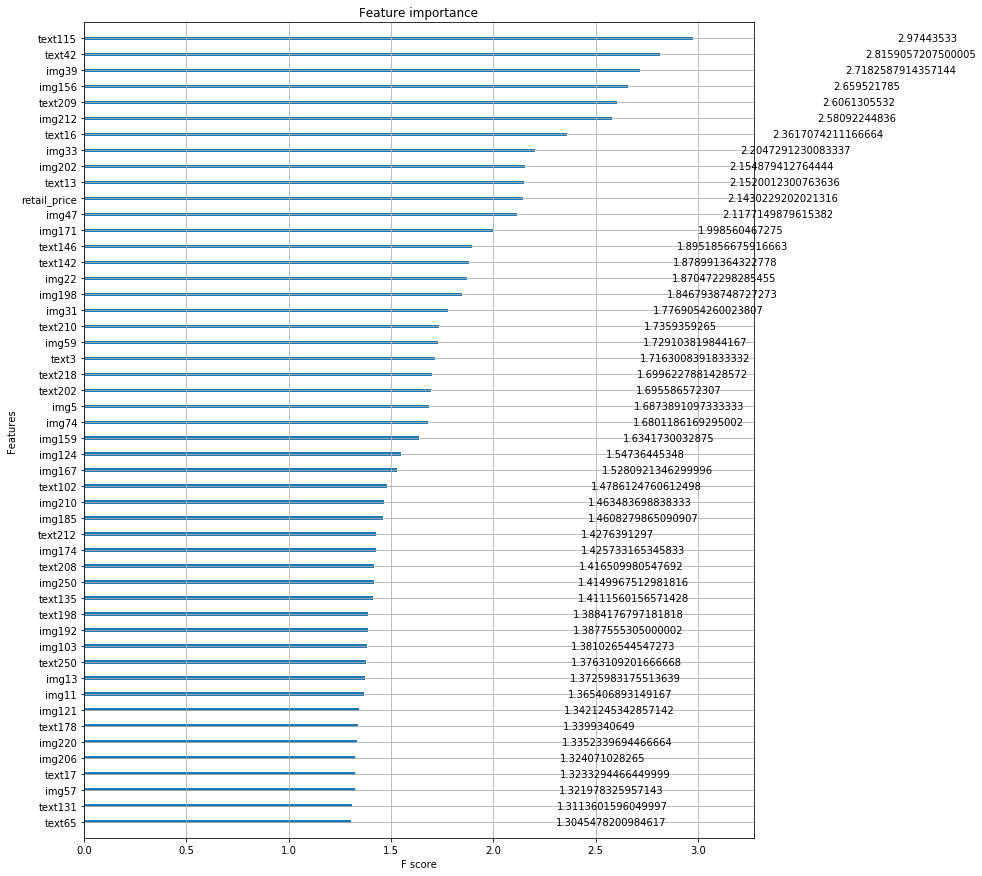

In [23]:
_, ax = plt.subplots(figsize=(12, 15))
xgb.plot_importance(xgb_model, ax=ax, max_num_features=50,importance_type='gain')